<a href="https://colab.research.google.com/github/DanielVinicius2/Projeto-Analise-Exploratoria-Daniel-e-Vinicius/blob/main/Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'brazilian-ecommerce' dataset.
Path to dataset files: /kaggle/input/brazilian-ecommerce


In [ ]:
# imports necessários para o tratamento e plotagem dos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler , StandardScaler , LabelEncoder, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold


In [ ]:
# Criando dataset(orders)
orders = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv")

# Criando dataset(items)
items = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv")

# Criando dataset(products)
products = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv")

In [ ]:
# 5 primeiras linhas do dataset(ordens)
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
# 5 primeiras linhas do dataset(items)
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
# 5 primeiras linhas do dataset(products)
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
# "Merging" os datasets
df = orders.merge(items, on='order_id', how='inner')
df= df.merge(products, on='product_id', how='left')

# 5 primeiras linhas do dataset(pós-merge)
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,...,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [ ]:
df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,112650,98666,8272b63d03f5f79c56e9e4120aec44ef,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,112650,98666,fc3d1daec319d62d49bfb5e1f83123e9,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_status,112650,7,delivered,110197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_purchase_timestamp,112650,98112,2017-07-16 18:19:25,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_approved_at,112635,90174,2018-02-24 03:20:27,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_delivered_carrier_date,111456,81017,2018-05-09 15:48:00,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_delivered_customer_date,110196,95664,2017-07-31 18:03:02,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_estimated_delivery_date,112650,450,2017-12-20 00:00:00,604,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_item_id,112650.0,NaN,NaN,NaN,1.197834,0.705124,1.0,1.0,1.0,1.0,21.0
product_id,112650,32951,aca2eb7d00ea1a7b8ebd4e68314663af,527,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_approved_at              112635 non-null  object 
 5   order_delivered_carrier_date   111456 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  112650 non-null  object 
 8   order_item_id                  112650 non-null  int64  
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

In [ ]:
columns_to_drop = [
      "order_item_id",
      "customer_id",
      "seller_id",
      "product_name_lenght",
      "product_description_lenght"
]
df.drop(columns_to_drop, axis=1, inplace=True)

df.head()


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,shipping_limit_date,price,freight_value,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,595fac2a385ac33a80bd5114aec74eb8,2018-07-30 03:24:27,118.70,22.76,perfumaria,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,aa4383b373c6aca5d8797843e5594415,2018-08-13 08:55:23,159.90,19.22,automotivo,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-23 19:45:59,45.00,27.20,pet_shop,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-19 20:31:37,19.90,8.72,papelaria,4.0,250.0,51.0,15.0,15.0


In [ ]:
df['order_status'].value_counts()

,count
order_status,
delivered,110197
shipped,1185
canceled,542
invoiced,359
processing,357
unavailable,7
approved,3


In [ ]:
# Criação das variavéis "nulos" e "duplicatas"
nulos = df.isnull().sum().sort_values(ascending=False)
duplicatas = (df.duplicated().sum())

In [ ]:
numericos = df.select_dtypes(include=["int64", "float64", "int32", "float32"]).columns.tolist()
categoricos = df.select_dtypes(include=["object", "category", "string"]).columns.tolist()

print("Colunas do tipo numericas")
print(numericos)
print(f"Quantidade {len(numericos)}")
print("------------------------------")
print("Colunas do tipo categorico")
print(categoricos)
print(f"Quantidade {len(categoricos)}")

Colunas do tipo numericas
['price', 'freight_value', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
Quantidade 7
------------------------------
Colunas do tipo categorico
['order_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'product_id', 'shipping_limit_date', 'product_category_name']
Quantidade 10


In [ ]:
print(f"Quantidade de nulos:\n{nulos}\n" ) # Colunas com valores nulos:
# order_delivered_customer_date(2454), product_category_name(1603)
print("Quantidade de duplicatas:", duplicatas) # duplicatas = 11037
# Logo, precisará de remoção por conta de duplicatas!

Quantidade de nulos:
order_delivered_customer_date    2454
product_category_name            1603
product_photos_qty               1603
order_delivered_carrier_date     1194
product_weight_g                   18
product_width_cm                   18
product_length_cm                  18
product_height_cm                  18
order_approved_at                  15
order_id                            0
shipping_limit_date                 0
order_estimated_delivery_date       0
order_status                        0
order_purchase_timestamp            0
product_id                          0
price                               0
freight_value                       0
dtype: int64

Quantidade de duplicatas: 10225


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe()

,price,freight_value,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,102425.000000,102425.000000,100965.000000,102409.000000,102409.000000,102409.000000,102409.000000
mean,124.422006,20.111152,2.239915,2090.916472,30.085285,16.409222,23.039528
std,188.926084,15.884700,1.743415,3750.962163,16.097482,13.310745,11.747033
min,0.850000,0.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,40.000000,13.140000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,78.800000,16.320000,2.000000,700.000000,25.000000,13.000000,20.000000
75%,139.000000,21.220000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,6735.000000,409.680000,20.000000,40425.000000,105.000000,105.000000,118.000000


<Figure size 1200x600 with 0 Axes>

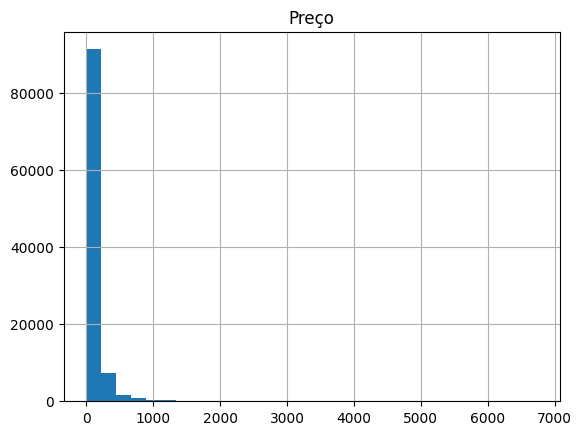

In [ ]:
plt.figure(figsize=(12, 6))
df[['price']].hist(bins=30)
plt.title("Preço")
plt.show()

In [ ]:
print("Descrição das colunas categoricas")
df[categoricos].describe()

Descrição das colunas categoricas


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,shipping_limit_date,product_category_name
count,102425,102425,102425,102411,101397,100195,102425,102425,102425,100965
unique,98666,7,98112,90174,81017,95664,450,32951,93318,73
top,ca3625898fbd48669d50701aba51cd5f,delivered,2018-08-12 02:11:20,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-08-21 12:18:48,2017-12-20 00:00:00,99a4788cb24856965c36a24e339b6058,2018-05-20 22:50:11,cama_mesa_banho
freq,8,100196,8,9,47,8,541,467,7,10160


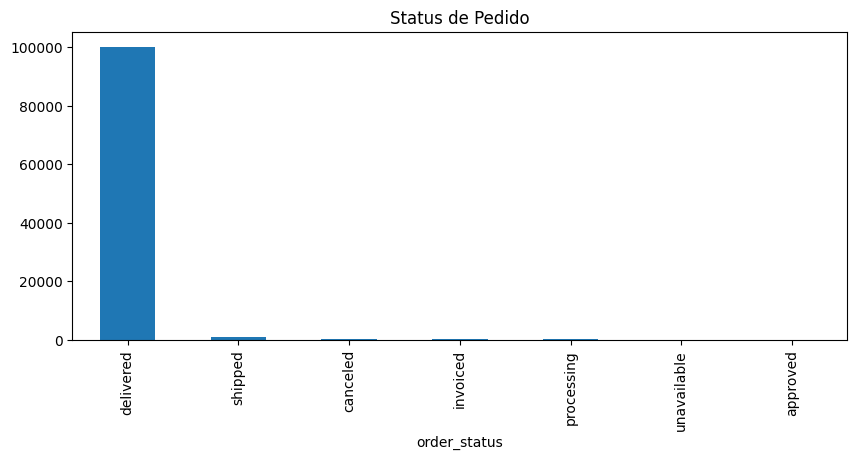

In [ ]:
df['order_status'].value_counts().plot(kind='bar', figsize=(10, 4))
plt.title("Status de Pedido")
plt.show()
# Mais de 95% dos pedidos foram entregues

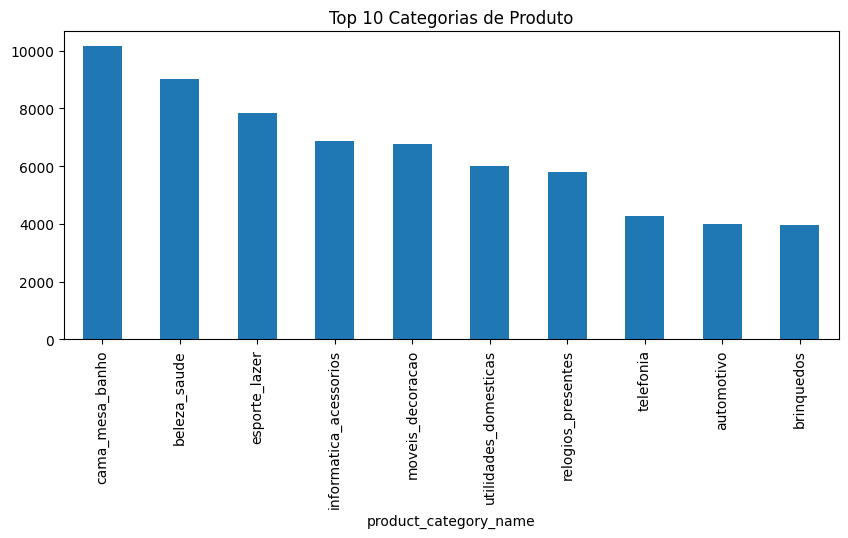

In [ ]:
df['product_category_name'].value_counts().head(10).plot(kind='bar', figsize=(10, 4))
plt.title("Top 10 Categorias de Produto")
plt.show()

In [ ]:
df.columns

Index(['order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'product_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

# Perguntas Norteadoras

### Quais características mais se relacionam com atrasos de entrega?


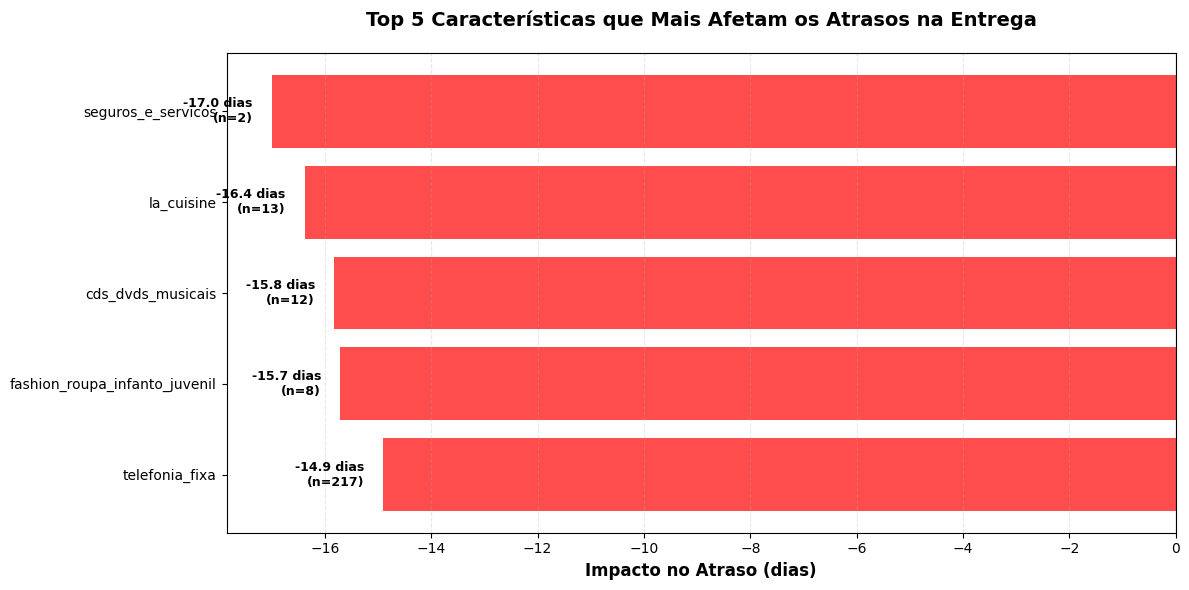

In [ ]:
# 1. Calculo atrasos
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'], errors='coerce')
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'], errors='coerce')
df['atraso_dias'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days

# 2. Calculo impacto por característica
resultados = []

# Analisar product_category_name
if 'product_category_name' in df.columns:
    # Calculo atraso médio por categoria
    atraso_medio = df.groupby('product_category_name')['atraso_dias'].mean()
    contagem = df.groupby('product_category_name').size()

    # Coleta de resultados
    for categoria, valor in atraso_medio.items():
        resultados.append({
            'Característica': f"{categoria}",
            'Impacto_Atraso': valor,
            'Contagem': contagem.get(categoria, 0)
        })

# Criar DataFrame com resultados
df_resultados = pd.DataFrame(resultados)

# Ordenar por impacto absoluto
df_resultados['Impacto_Absoluto'] = df_resultados['Impacto_Atraso'].abs()
df_top5_primeiros = df_resultados.sort_values('Impacto_Absoluto', ascending=False).head()

# ============================================
# PRIMEIRO GRÁFICO: Características mais RELEVANTES
# ============================================
fig1, ax1 = plt.subplots(figsize=(12, 6))

# Cores baseadas no sinal do impacto
colors = ['red' if x < 0 else 'green' for x in df_top5_primeiros['Impacto_Atraso']]

# Gráfico de barras horizontais
bars_relevante = ax1.barh(df_top5_primeiros['Característica'],
                          df_top5_primeiros['Impacto_Atraso'],
                          color=colors, alpha=0.7)

# Linha vertical no zero
ax1.axvline(x=0, color='black', linestyle='-', linewidth=0.8, alpha=0.5)

# Configurações do gráfico
ax1.set_xlabel('Impacto no Atraso (dias)', fontsize=12, fontweight='bold')
ax1.set_title('Top 5 Características que Mais Afetam os Atrasos na Entrega',
              fontsize=14, fontweight='bold', pad=20)

# Adicionar valores nas barras
for bar, impacto, contagem in zip(bars_relevante, df_top5_primeiros['Impacto_Atraso'], df_top5_primeiros['Contagem']):
    # Posição do texto
    if impacto < 0:
        text_x = impacto - (ax1.get_xlim()[1] - ax1.get_xlim()[0]) * 0.02
        ha = 'right'
    else:
        text_x = impacto + (ax1.get_xlim()[1] - ax1.get_xlim()[0]) * 0.02
        ha = 'left'

    # Texto com valor e contagem
    ax1.text(text_x, bar.get_y() + bar.get_height()/2,
            f'{impacto:.1f} dias\n(n={contagem})',
            va='center', ha=ha, fontsize=9, fontweight='bold')

# Inverter ordem para ter o maior impacto no topo
ax1.invert_yaxis()

# Grid
ax1.grid(True, axis='x', alpha=0.3, linestyle='--')

# Ajustar layout
plt.tight_layout()
plt.show()



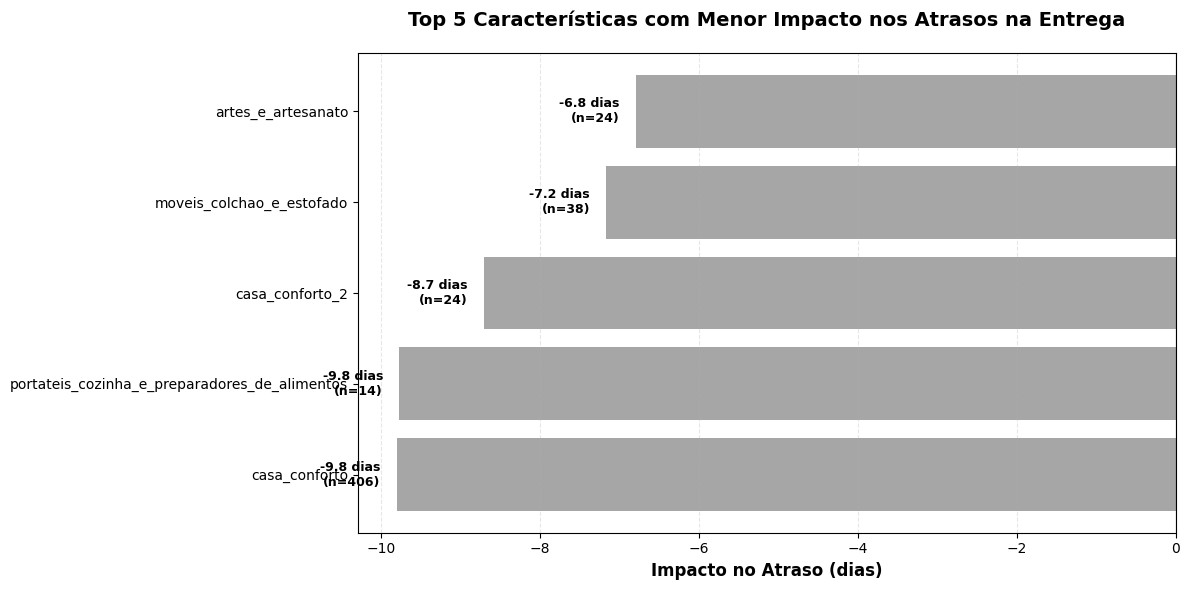

In [ ]:
# ============================================
# SEGUNDO GRÁFICO: Características mais IRRELEVANTES
# ============================================

df_top5_ultimos = df_resultados.sort_values('Impacto_Absoluto', ascending=True).head()

fig2, ax2 = plt.subplots(figsize=(12, 6))

# Gráfico de barras horizontais para irrelevantes (cor cinza)
bars_irrelevante = ax2.barh(df_top5_ultimos['Característica'],
                            df_top5_ultimos['Impacto_Atraso'],
                            color='gray', alpha=0.7)

# Linha vertical no zero
ax2.axvline(x=0, color='black', linestyle='-', linewidth=0.8, alpha=0.5)

# Configurações do gráfico
ax2.set_xlabel('Impacto no Atraso (dias)', fontsize=12, fontweight='bold')
ax2.set_title('Top 5 Características com Menor Impacto nos Atrasos na Entrega',
              fontsize=14, fontweight='bold', pad=20)

# Adicionar valores nas barras
for bar, impacto, contagem in zip(bars_irrelevante, df_top5_ultimos['Impacto_Atraso'], df_top5_ultimos['Contagem']):
    # Posição do texto
    if impacto < 0:
        text_x = impacto - (ax2.get_xlim()[1] - ax2.get_xlim()[0]) * 0.02
        ha = 'right'
    else:
        text_x = impacto + (ax2.get_xlim()[1] - ax2.get_xlim()[0]) * 0.02
        ha = 'left'

    ax2.text(text_x, bar.get_y() + bar.get_height()/2,
            f'{impacto:.1f} dias\n(n={contagem})',
            va='center', ha=ha, fontsize=9, fontweight='bold')

# Inverter ordem para ter o menor impacto no topo
ax2.invert_yaxis()

# Grid
ax2.grid(True, axis='x', alpha=0.3, linestyle='--')

# Ajustar layout
plt.tight_layout()
plt.show()

###  A limpeza alterou o comportamento dos dados? Como e por quê?

In [ ]:
# Sim, a limpeza dos dados alterou o comportamento dos dados pois, ao remover inconsistências,
# corrigir valores ausentes, tratar outliers e padronizar informações, o conjunto passou a refletir
# de forma mais fiel o fenômeno analisado. Esse processo reduziu ruídos, diminuiu distorções
# estatísticas e ajustou distribuições que antes estavam comprometidas por erros ou irregularidades.

### Existem categorias de produtos com maior frequência de problemas (atrasos, preços absurdos, fretes altos)?

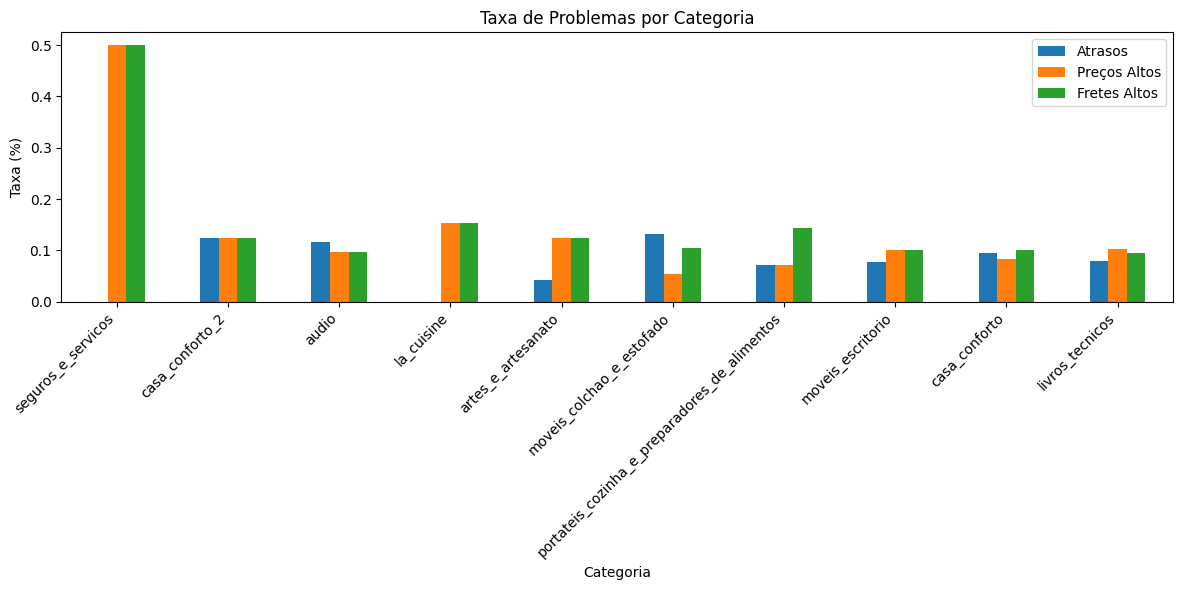

In [ ]:
# Métrica simples para identificar problemas
analise_simples = df.groupby('product_category_name').agg({
    'order_id': 'count',
    'atraso_dias': lambda x: (x > 0).mean(),  # % de atrasos
    'price': lambda x: (x > x.quantile(0.9)).mean(),  # % de preços no top 10%
    'freight_value': lambda x: (x > x.quantile(0.9)).mean()  # % de fretes no top 10%
}).round(3)

# Renomear
analise_simples.columns = ['total_pedidos', 'taxa_atraso', 'taxa_preco_alto', 'taxa_frete_alto']

# Ordenar pela soma dos problemas
analise_simples['soma_problemas'] = (
    analise_simples['taxa_atraso'] +
    analise_simples['taxa_preco_alto'] +
    analise_simples['taxa_frete_alto']
)

# Top 10 categorias problemáticas
top_problematicas = analise_simples.sort_values('soma_problemas', ascending=False).head(10)

# Gráfico simples
top_problematicas[['taxa_atraso', 'taxa_preco_alto', 'taxa_frete_alto']].plot(
    kind='bar',
    figsize=(12, 6),
    title='Taxa de Problemas por Categoria',
    xlabel='Categoria',
    ylabel='Taxa (%)'
)
plt.xticks(rotation=45, ha='right')
plt.legend(['Atrasos', 'Preços Altos', 'Fretes Altos'])
plt.tight_layout()
plt.show()

### Os dados apresentam outliers significativos? Como foram tratados?

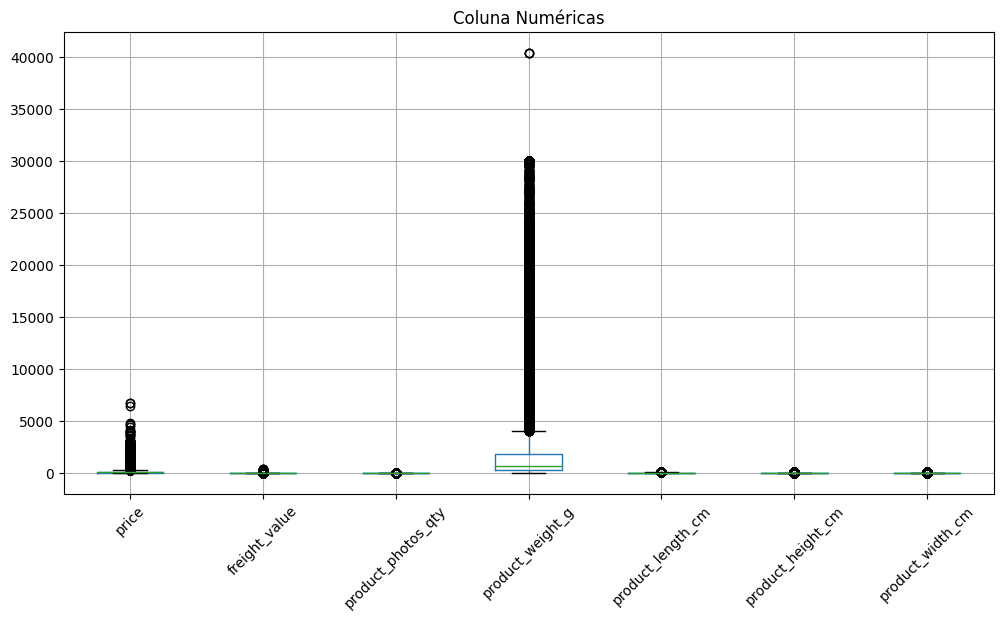

In [ ]:
plt.figure(figsize=(12, 6))
df[numericos].boxplot()
plt.xticks(rotation=45)
plt.title("Coluna Numéricas")
plt.show()
# É possivel analisar a presença de outiliers Fortes
# Preços (Max = 6735; 3Q = 139.4)
# Frete (Max = 409; 3Q = 21)
# Tamanho do Produto (Max = 40425; 3Q = 1800)
# Dimensões (Max = 105, 105, 118; 3Q = 38, 20, 30)

In [ ]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.dropna().reset_index(drop=True)
df.isna().sum()

,0
order_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0
product_id,0
shipping_limit_date,0
price,0


In [ ]:
def winsorize_mediana(s, lower=0.25, upper=0.75):
    q1 = s.quantile(lower)
    q2 = s.quantile(upper)
    mediana = s.median()

    s = s.copy()
    s[s < q1] = mediana
    s[s > q2] = mediana

    return s

df["price"] = winsorize_mediana(df["price"])
df["freight_value"] = winsorize_mediana(df["freight_value"])


In [ ]:
def remover_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    limit_inf = Q1 - 1.5 * IQR
    limit_sup = Q3 + 1.5 * IQR
    return df[(df[column] >= limit_inf) & (df[column] <= limit_sup)]

cols_iqr = [
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm"
]

for col in cols_iqr:
    df = remover_outliers_iqr(df, col)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76876 entries, 0 to 98778
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       76876 non-null  object        
 1   order_status                   76876 non-null  object        
 2   order_purchase_timestamp       76876 non-null  object        
 3   order_approved_at              76876 non-null  object        
 4   order_delivered_carrier_date   76876 non-null  object        
 5   order_delivered_customer_date  76876 non-null  datetime64[ns]
 6   order_estimated_delivery_date  76876 non-null  datetime64[ns]
 7   product_id                     76876 non-null  object        
 8   shipping_limit_date            76876 non-null  object        
 9   price                          76876 non-null  float64       
 10  freight_value                  76876 non-null  float64       
 11  product_category_nam

In [ ]:
df.drop(['shipping_limit_date','order_id','product_id',"order_status",'order_purchase_timestamp', 'order_delivered_carrier_date', 'order_approved_at', 'order_delivered_customer_date','order_estimated_delivery_date' ], axis=1, inplace=True)
df

,price,freight_value,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,atraso_dias
0,78.0,16.35,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0,-8.0
1,118.7,16.35,perfumaria,1.0,400.0,19.0,13.0,19.0,-6.0
2,78.0,19.22,automotivo,1.0,420.0,24.0,19.0,21.0,-18.0
3,45.0,16.35,pet_shop,3.0,450.0,30.0,10.0,20.0,-13.0
4,78.0,16.35,papelaria,4.0,250.0,51.0,15.0,15.0,-10.0
...,...,...,...,...,...,...,...,...,...
98771,78.0,16.35,brinquedos,3.0,750.0,26.0,15.0,26.0,-18.0
98772,78.0,19.43,beleza_saude,1.0,750.0,38.0,12.0,25.0,-38.0
98773,78.0,16.09,moveis_decoracao,2.0,2500.0,49.0,13.0,41.0,-16.0
98774,72.0,16.35,beleza_saude,1.0,1175.0,22.0,13.0,18.0,-11.0


In [ ]:
df.to_csv('df_tratado.csv', index=False)

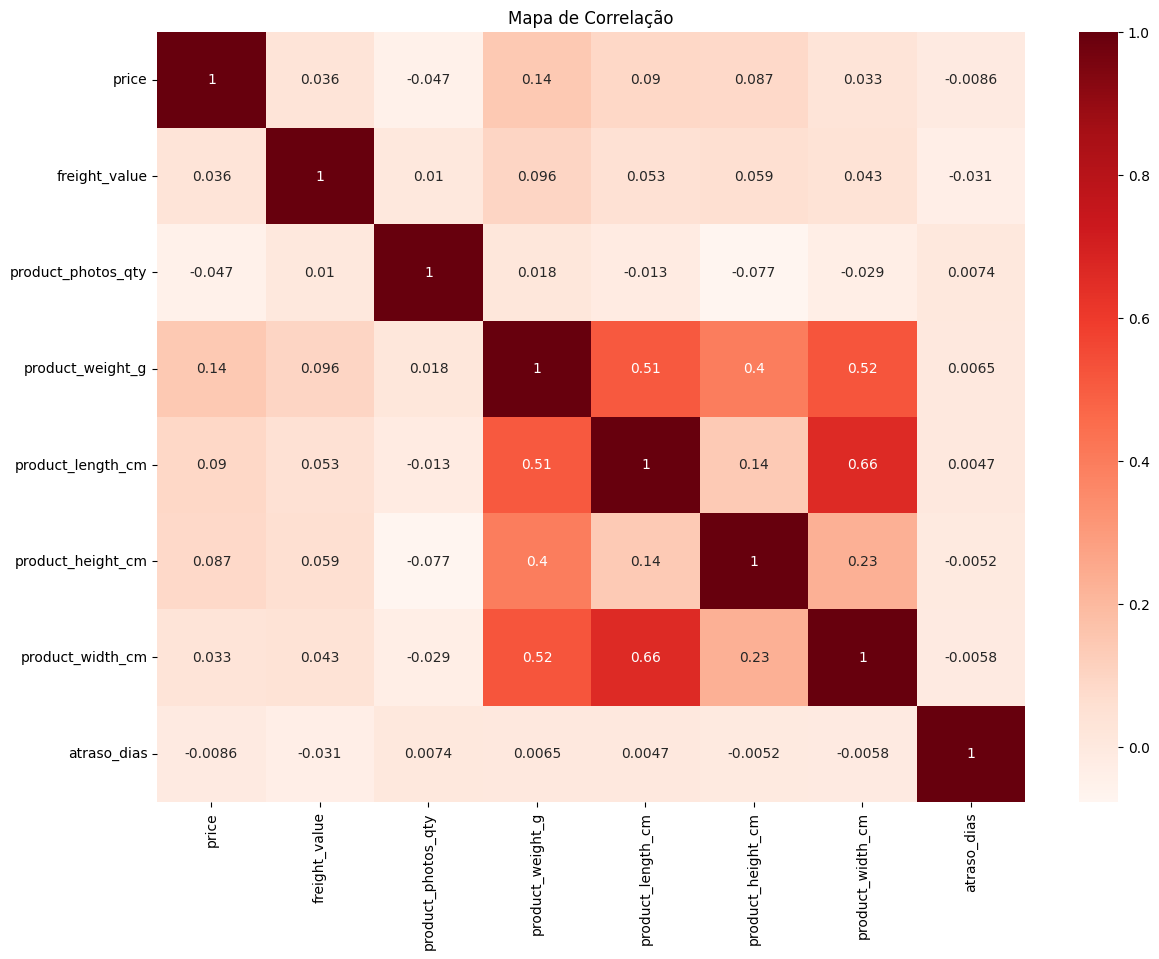

In [ ]:
# Colunas numéricas originais
cols_num = [
    "price", "freight_value", "product_photos_qty",
    "product_weight_g", "product_length_cm",
    "product_height_cm", "product_width_cm"
]

# Colunas criadas no feature engineering
cols_mod = ["atraso_dias"]

# Junta todas as colunas numéricas
all_numeric_cols = cols_num + cols_mod

plt.figure(figsize=(14, 10))
sns.heatmap(df[all_numeric_cols].corr(), annot=True, cmap="Reds")
plt.title("Mapa de Correlação")
plt.show()